In [1]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

In [2]:
segmnt_dt = pd.read_csv("segmentation data.csv", index_col=0)

In [3]:
segmnt_dt.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
segmnt_dt.shape

(2000, 7)

In [5]:
segmnt_dt.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [6]:
segmnt_dt.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


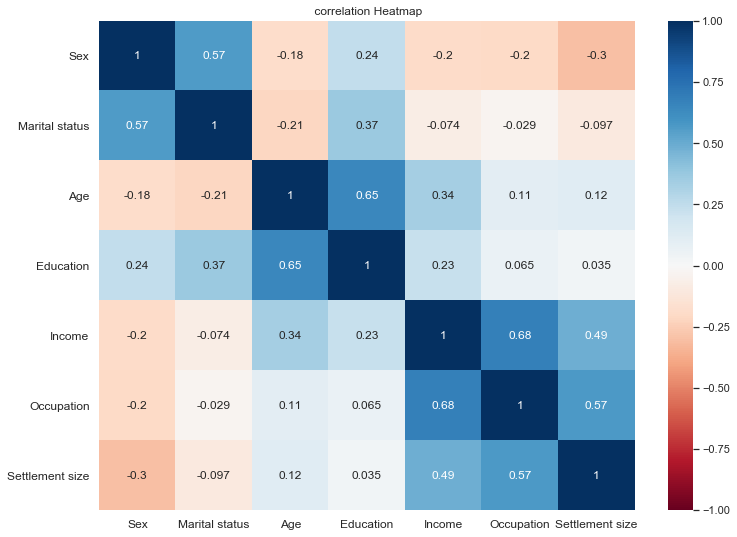

In [7]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(segmnt_dt.corr(),
               annot=True,
               cmap="RdBu",
               vmin=-1,
               vmax=1)
s.set_yticklabels(
    s.get_yticklabels(), 
    rotation=0, 
    fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=0, fontsize=12)
plt.title(" correlation Heatmap")
plt.show()

Text(0.5, 1.0, 'Visualization of raw data')

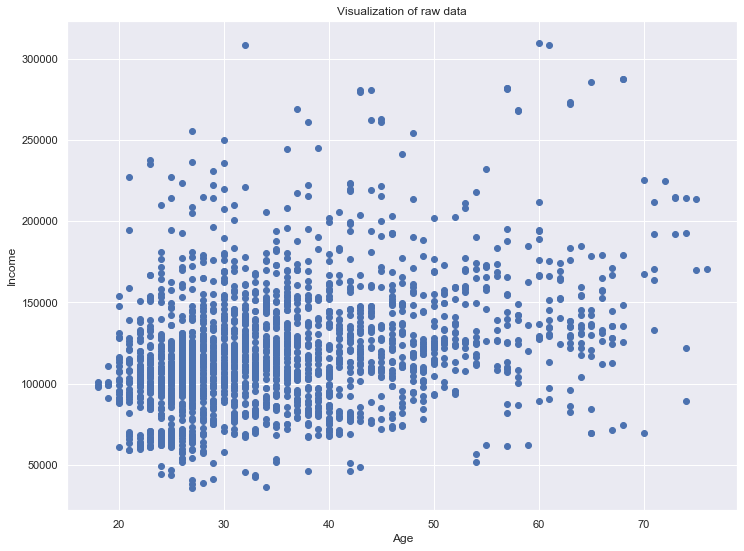

In [8]:
plt.figure(figsize = (12, 9))
plt.scatter(
    segmnt_dt.iloc[:,2], 
    segmnt_dt.iloc[:,4])

plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Visualization of raw data")

In [9]:
segmnt_dt

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [10]:
# new_mall_cust = mall_cust.drop(axis=1, columns="")
sscaler = StandardScaler()
df_sscaler_segmnt = sscaler.fit_transform(segmnt_dt) 

In [11]:
hier_clust = linkage(df_sscaler_segmnt, method="ward")

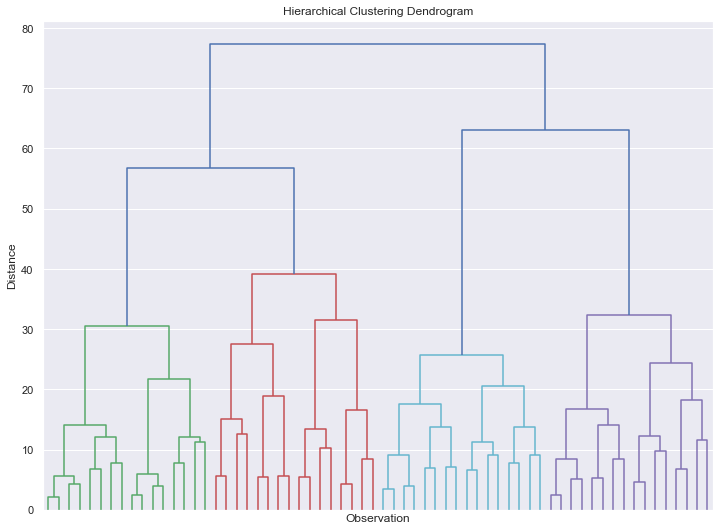

In [12]:
plt.figure(figsize=(12, 9))
plt.ylabel("Distance")
plt.xlabel("Observation")
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(hier_clust,
          truncate_mode="level",
          p=5,
          show_leaf_counts=False,
          no_labels=True,
#           color_threshold=0
          )
plt.show()

In [13]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state=42 )
    kmeans.fit(df_sscaler_segmnt)
    wcss.append(kmeans.inertia_)

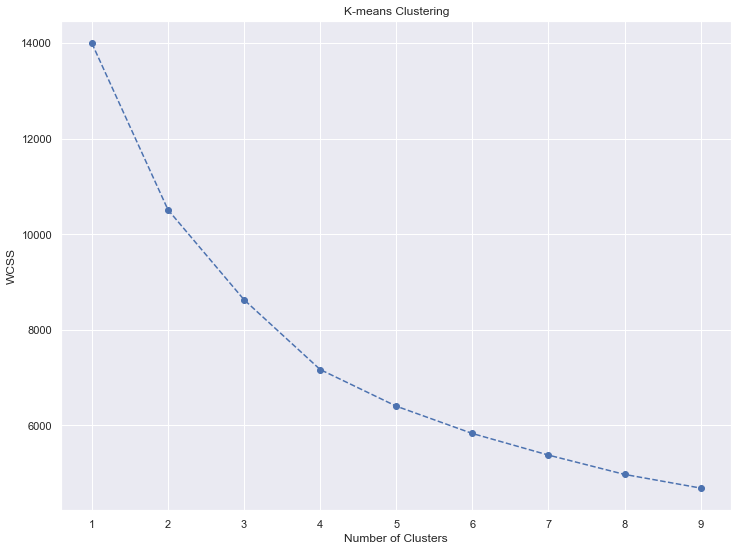

In [14]:
plt.figure(figsize=(12, 9))
plt.plot(range(1, 10), wcss, marker = 'o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("K-means Clustering")
plt.show()

In [15]:
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=42)

In [16]:
kmeans.fit(df_sscaler_segmnt)

KMeans(n_clusters=4, random_state=42)

In [17]:
df_sgmnt_kmns = segmnt_dt.copy()
df_sgmnt_kmns['Segment K-means'] = kmeans.labels_

In [18]:
df_sgmnt_kmns.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
ID,,,,,,,,
100000001,0,0,67,2,124670,1,2,0
100000002,1,1,22,1,150773,1,2,3
100000003,0,0,49,1,89210,0,0,1
100000004,0,0,45,1,171565,1,1,2
100000005,0,0,53,1,149031,1,1,2


In [19]:
df_sgmnt_analysis = df_sgmnt_kmns.groupby(['Segment K-means']).mean()
df_sgmnt_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [20]:
df_sgmnt_analysis['N Obs'] = df_sgmnt_kmns[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()

# df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','Sex']].groupby(['Segment K-means']).count()
# df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [21]:
df_sgmnt_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs
Segment K-means,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705


In [22]:
df_sgmnt_analysis['Prop Obs'] = df_sgmnt_analysis['N Obs'] / df_sgmnt_analysis['N Obs'].sum()
df_sgmnt_analysis.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [23]:
df_sgmnt_analysis.rename({0:'well off',
                         1:'fewer opportunity',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer opportunity,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
career focused,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [24]:
df_sgmnt_kmns['Labels'] = df_sgmnt_kmns['Segment K-means'].map({0:'well off',
                         1:'fewer opportunity',
                         2:'standard',
                         3:'career focused'})
df_sgmnt_kmns

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,well off
100000002,1,1,22,1,150773,1,2,3,career focused
100000003,0,0,49,1,89210,0,0,1,fewer opportunity
100000004,0,0,45,1,171565,1,1,2,standard
100000005,0,0,53,1,149031,1,1,2,standard
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,fewer opportunity
100001997,1,1,27,1,117744,1,0,3,career focused
100001998,0,0,31,0,86400,0,0,1,fewer opportunity


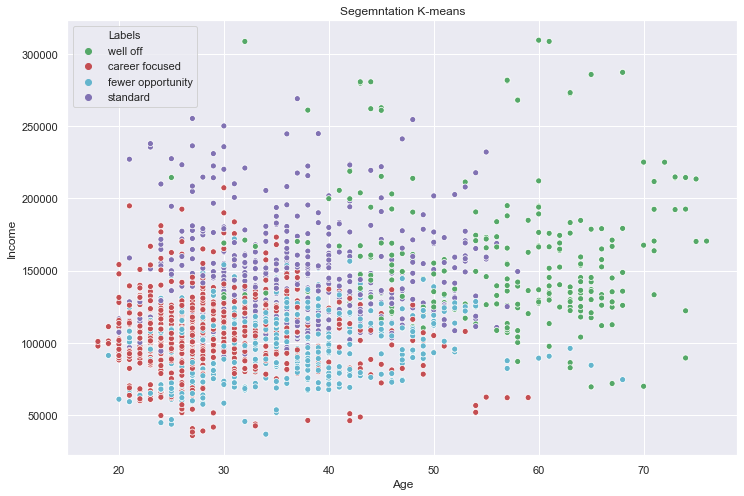

In [25]:
x_axis = df_sgmnt_kmns['Age']
y_axis = df_sgmnt_kmns['Income']
plt.figure(figsize=(12, 8))
sns.scatterplot(x_axis, y_axis, 
            hue=df_sgmnt_kmns['Labels'], 
            palette=['g','r','c','m'])
plt.title('Segemntation K-means')
plt.show()

In [26]:
pca = PCA()

In [27]:
pca.fit(df_sscaler_segmnt)

PCA()

In [28]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cumulative Explained Variance')

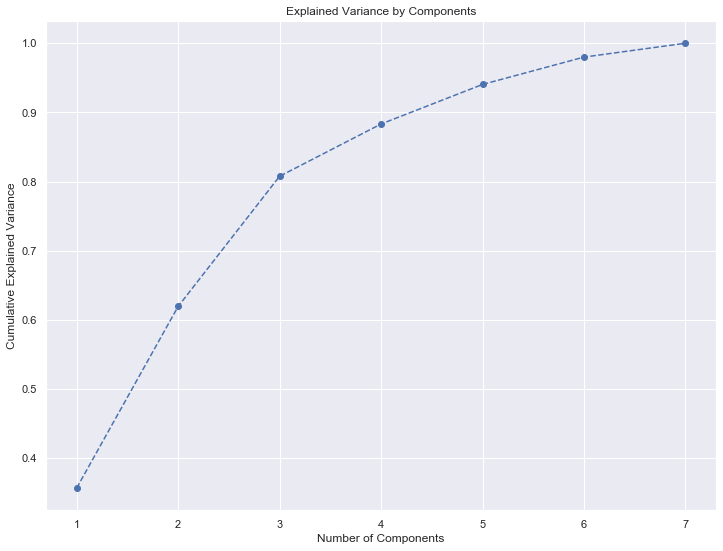

In [29]:
plt.figure(figsize=(12, 9))
plt.plot(range(1, 8), 
         pca.explained_variance_ratio_.cumsum(), 
         marker = 'o', 
         linestyle = '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel('Cumulative Explained Variance')

In [30]:
pca_scnd = PCA(n_components=3)

In [31]:
pca_scnd.fit(df_sscaler_segmnt)

PCA(n_components=3)

In [32]:
pca_scnd.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [33]:
df_pca_comp = pd.DataFrame(data = pca_scnd.components_,
                          columns = segmnt_dt.columns.values,
                           index = ['Component 1',
                                    'Component 2',
                                    'Component 3'])
df_pca_comp

# df_pca_cmp = pd.DataFrame(data = pca.components_,
#                          columns = df_segmentation.columns.values,
#                          index = ['Components 1',
#                                  'Component 2',
#                                  'Component 3',
#                                  'Component 4'])
# df_pca_cmp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x1df62d13488>,
 <a list of 3 Text yticklabel objects>)

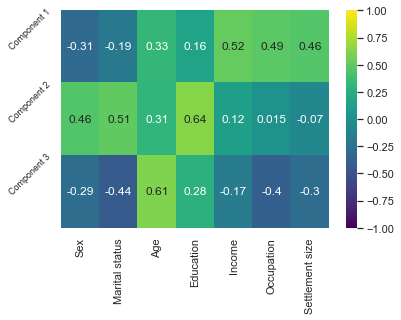

In [34]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
# Use different color themes (cmap): you can try use viridis, Blues, YlGnBu, RdBu.
sns.heatmap(df_pca_comp,
           vmin = -1,
           vmax = 1,
           cmap = 'viridis',
           annot = True)
plt.yticks([0, 1, 2],
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 9)


In [35]:
pca_scnd.transform(df_sscaler_segmnt)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [36]:
scores_pca_scnd = pca_scnd.transform(df_sscaler_segmnt)

## K-Means Clustering with PCA

In [37]:
wcss = []
for i in range(1,11):
    kmeans_pca_scnd = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca_scnd.fit(scores_pca_scnd)
    wcss.append(kmeans_pca_scnd.inertia_)

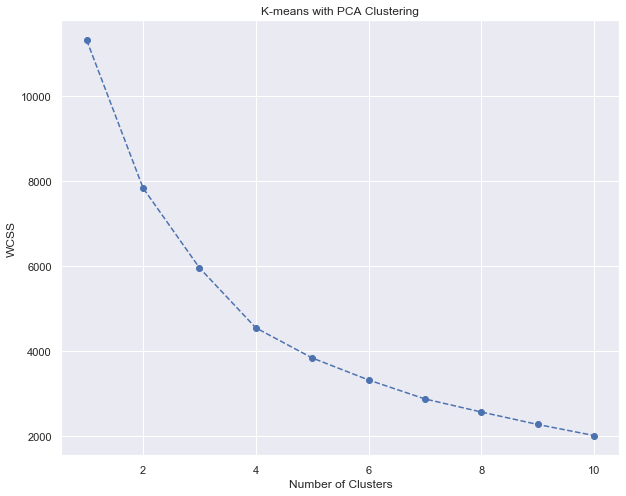

In [38]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [39]:
kmns_pca_scnd = KMeans(n_clusters=3, 
                             init='k-means++', 
                             random_state=42)

In [40]:
kmns_pca_scnd.fit(scores_pca_scnd)

KMeans(n_clusters=3, random_state=42)

### KMeans clustering with PCA Results

In [41]:
df_sgmnt_pca_kmns = pd.concat([segmnt_dt.reset_index(drop = True), pd.DataFrame(scores_pca_scnd)], axis = 1)
df_sgmnt_pca_kmns.columns.values[-3: ] = ['Component 1', 
                                          'Component 2', 
                                          'Component 3']
df_sgmnt_pca_kmns['Segment K-means PCA'] = kmns_pca_scnd.labels_

In [42]:
df_sgmnt_pca_kmns

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [43]:
df_sgmnt_pca_kmns_freq = df_sgmnt_pca_kmns.groupby(['Segment K-means PCA']).mean()
df_sgmnt_pca_kmns_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.50000,0.671533,55.777372,2.124088,156011.791971,1.083942,1.065693,1.623113,2.000287,0.912070
1,0.03281,0.154066,35.699001,0.726106,137906.105563,1.192582,1.275321,1.146573,-1.061217,-0.107693
2,0.73561,0.683902,30.741463,0.960976,99989.684878,0.476098,0.284878,-1.218030,0.191058,-0.170161


In [44]:
df_sgmnt_pca_kmns_freq['N Obs'] = df_sgmnt_pca_kmns[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_sgmnt_pca_kmns_freq['Prop Obs'] = df_sgmnt_pca_kmns_freq['N Obs'] / df_sgmnt_pca_kmns_freq['N Obs'].sum()
df_sgmnt_pca_kmns_freq = df_sgmnt_pca_kmns_freq.rename({0:'well off',
                                                       1:'career focused',
                                                       2:'standard'})
df_sgmnt_pca_kmns_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
well off,0.50000,0.671533,55.777372,2.124088,156011.791971,1.083942,1.065693,1.623113,2.000287,0.912070,274,0.1370
career focused,0.03281,0.154066,35.699001,0.726106,137906.105563,1.192582,1.275321,1.146573,-1.061217,-0.107693,701,0.3505
standard,0.73561,0.683902,30.741463,0.960976,99989.684878,0.476098,0.284878,-1.218030,0.191058,-0.170161,1025,0.5125


In [45]:
df_sgmnt_pca_kmns['Legend'] = df_sgmnt_pca_kmns['Segment K-means PCA'].map({0:'well off',
                                                                             1:'career focused',
                                                                             2:'standard'})

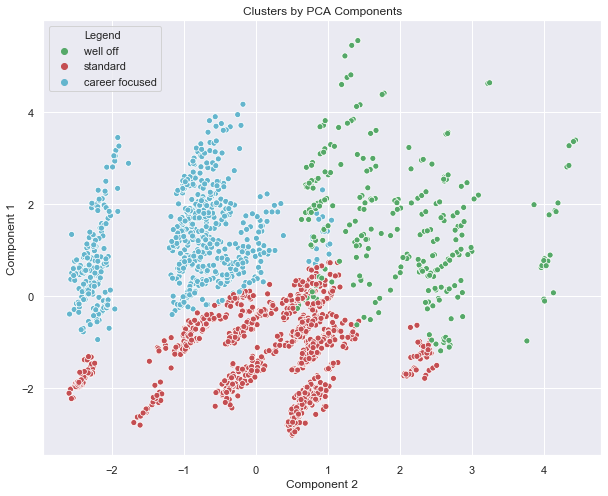

In [46]:
x_axis = df_sgmnt_pca_kmns['Component 2']
y_axis = df_sgmnt_pca_kmns['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, 
                hue = df_sgmnt_pca_kmns['Legend'], 
                palette = ['g',
                           'r',
                           'c',
                           ])
plt.title('Clusters by PCA Components')
plt.show()

In [49]:
pickle.dump(sscaler, open('scaler.pickle', 'wb'))

In [50]:
pickle.dump(pca_scnd, open('scaler.pickle', 'wb'))

In [51]:
pickle.dump(kmns_pca_scnd, open('scaler.pickle', 'wb'))